# TEMPORAL SERIES ANALYSIS

We are going to load the data and analyze Train and Test as a whole. We will analyse domain shift in a separate notebook.

In [29]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas.plotting import lag_plot
from ipywidgets import Button, Output, HBox
import ipywidgets as widgets
from pandas.plotting import autocorrelation_plot
from IPython.display import display, clear_output
from sklearn.impute import KNNImputer
from statsmodels.tsa.stattools import adfuller

# Importing the dataset
X_train = pd.read_csv('../data/X_train.csv')
X_test = pd.read_csv('../data/X_test.csv')

Let's check what we have in the data.

In [2]:
X_train

,DELIVERY_START,load_forecast,coal_power_available,gas_power_available,nucelear_power_available,wind_power_forecasts_average,solar_power_forecasts_average,wind_power_forecasts_std,solar_power_forecasts_std,predicted_spot_price
0,2022-01-01 02:00:00+01:00,49439.0,3386.0,11487.0,44118.0,3035.0,0.0,79.248348,0.000000,NaN
1,2022-01-01 03:00:00+01:00,46511.0,3386.0,11487.0,44118.0,3143.0,0.0,61.776532,0.000000,NaN
2,2022-01-01 04:00:00+01:00,45158.0,3386.0,11487.0,44118.0,3288.0,0.0,44.291112,0.000000,NaN
3,2022-01-01 05:00:00+01:00,44779.0,3386.0,11487.0,44118.0,3447.0,0.0,36.127588,0.000000,NaN
4,2022-01-01 06:00:00+01:00,45284.0,3386.0,11487.0,44118.0,3679.0,0.0,30.983023,0.000000,NaN
...,...,...,...,...,...,...,...,...,...,...
10600,2023-03-29 19:00:00+02:00,50814.0,3386.0,11952.0,38320.0,7552.0,651.0,247.408490,7.821622,108.11
10601,2023-03-29 20:00:00+02:00,50628.0,3386.0,11952.0,38320.0,8338.0,109.0,155.795012,2.534054,125.66
10602,2023-03-29 21:00:00+02:00,48201.0,3386.0,11952.0,38320.0,9115.0,0.0,126.884684,0.000000,138.01
10603,2023-03-29 22:00:00+02:00,47967.0,3386.0,11952.0,38320.0,9636.0,0.0,156.669189,0.000000,136.74


In [3]:
X_test

,DELIVERY_START,load_forecast,coal_power_available,gas_power_available,nucelear_power_available,wind_power_forecasts_average,solar_power_forecasts_average,wind_power_forecasts_std,solar_power_forecasts_std,predicted_spot_price
0,2023-04-02 00:00:00+02:00,45814.0,3386.0,10902.0,36705.0,6359.0,0.0,56.764535,0.0,NaN
1,2023-04-02 01:00:00+02:00,44084.0,3386.0,10902.0,36705.0,6469.0,0.0,54.262133,0.0,NaN
2,2023-04-02 02:00:00+02:00,43281.0,3386.0,10902.0,36705.0,6511.0,0.0,78.105928,0.0,NaN
3,2023-04-02 03:00:00+02:00,40825.0,3386.0,10902.0,36705.0,6628.0,0.0,78.187557,0.0,NaN
4,2023-04-02 04:00:00+02:00,39181.0,3386.0,10902.0,36705.0,6700.0,0.0,96.765484,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...
4937,2023-10-24 19:00:00+02:00,49686.0,2226.0,11749.0,42980.0,4901.0,0.0,247.887323,0.0,125.67
4938,2023-10-24 20:00:00+02:00,53397.0,2226.0,11749.0,42980.0,5584.0,0.0,343.192642,0.0,139.58
4939,2023-10-24 21:00:00+02:00,50586.0,2226.0,11749.0,42980.0,6306.0,0.0,471.875973,0.0,147.93
4940,2023-10-24 22:00:00+02:00,46777.0,2226.0,11749.0,42980.0,6959.0,0.0,595.528100,0.0,122.20


## REINDEXING

Now we need to concatenate the data and analyze it as a whole. First we convert every data to UTC timezone, and then we check for missing date between and in between values. We are going to fill thoses blanks with NaN values for the moment.

In [4]:
def convertToDatetime(X):
    X.DELIVERY_START = pd.to_datetime(X.DELIVERY_START, utc=True)
    X.index = pd.to_datetime(X.DELIVERY_START)
    return X

def fillMissingDates(X):
    start_date = X.index.min()
    end_date = X.index.max()
    full_range = pd.date_range(start=start_date, end=end_date, freq='H')

    X = X.reindex(full_range)

    return X

def fromDateToColumns(X):
    date = X.DELIVERY_START
    
    X['years'] = date.dt.year
    X['months'] = date.dt.month
    X['days'] = date.dt.day
    X['hours'] = date.dt.hour

    X = X.drop(columns=['DELIVERY_START'])
    
    return X

X_train = convertToDatetime(X_train)
X_test = convertToDatetime(X_test)

X = pd.concat([X_train, X_test])
X = fillMissingDates(X)
X = fromDateToColumns(X)
X

,load_forecast,coal_power_available,gas_power_available,nucelear_power_available,wind_power_forecasts_average,solar_power_forecasts_average,wind_power_forecasts_std,solar_power_forecasts_std,predicted_spot_price,years,months,days,hours
2022-01-01 01:00:00+00:00,49439.0,3386.0,11487.0,44118.0,3035.0,0.0,79.248348,0.0,NaN,2022.0,1.0,1.0,1.0
2022-01-01 02:00:00+00:00,46511.0,3386.0,11487.0,44118.0,3143.0,0.0,61.776532,0.0,NaN,2022.0,1.0,1.0,2.0
2022-01-01 03:00:00+00:00,45158.0,3386.0,11487.0,44118.0,3288.0,0.0,44.291112,0.0,NaN,2022.0,1.0,1.0,3.0
2022-01-01 04:00:00+00:00,44779.0,3386.0,11487.0,44118.0,3447.0,0.0,36.127588,0.0,NaN,2022.0,1.0,1.0,4.0
2022-01-01 05:00:00+00:00,45284.0,3386.0,11487.0,44118.0,3679.0,0.0,30.983023,0.0,NaN,2022.0,1.0,1.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-10-24 17:00:00+00:00,49686.0,2226.0,11749.0,42980.0,4901.0,0.0,247.887323,0.0,125.67,2023.0,10.0,24.0,17.0
2023-10-24 18:00:00+00:00,53397.0,2226.0,11749.0,42980.0,5584.0,0.0,343.192642,0.0,139.58,2023.0,10.0,24.0,18.0
2023-10-24 19:00:00+00:00,50586.0,2226.0,11749.0,42980.0,6306.0,0.0,471.875973,0.0,147.93,2023.0,10.0,24.0,19.0
2023-10-24 20:00:00+00:00,46777.0,2226.0,11749.0,42980.0,6959.0,0.0,595.528100,0.0,122.20,2023.0,10.0,24.0,20.0


## CHRONOGRAME

Now we are going to plot the chronograms of each column.

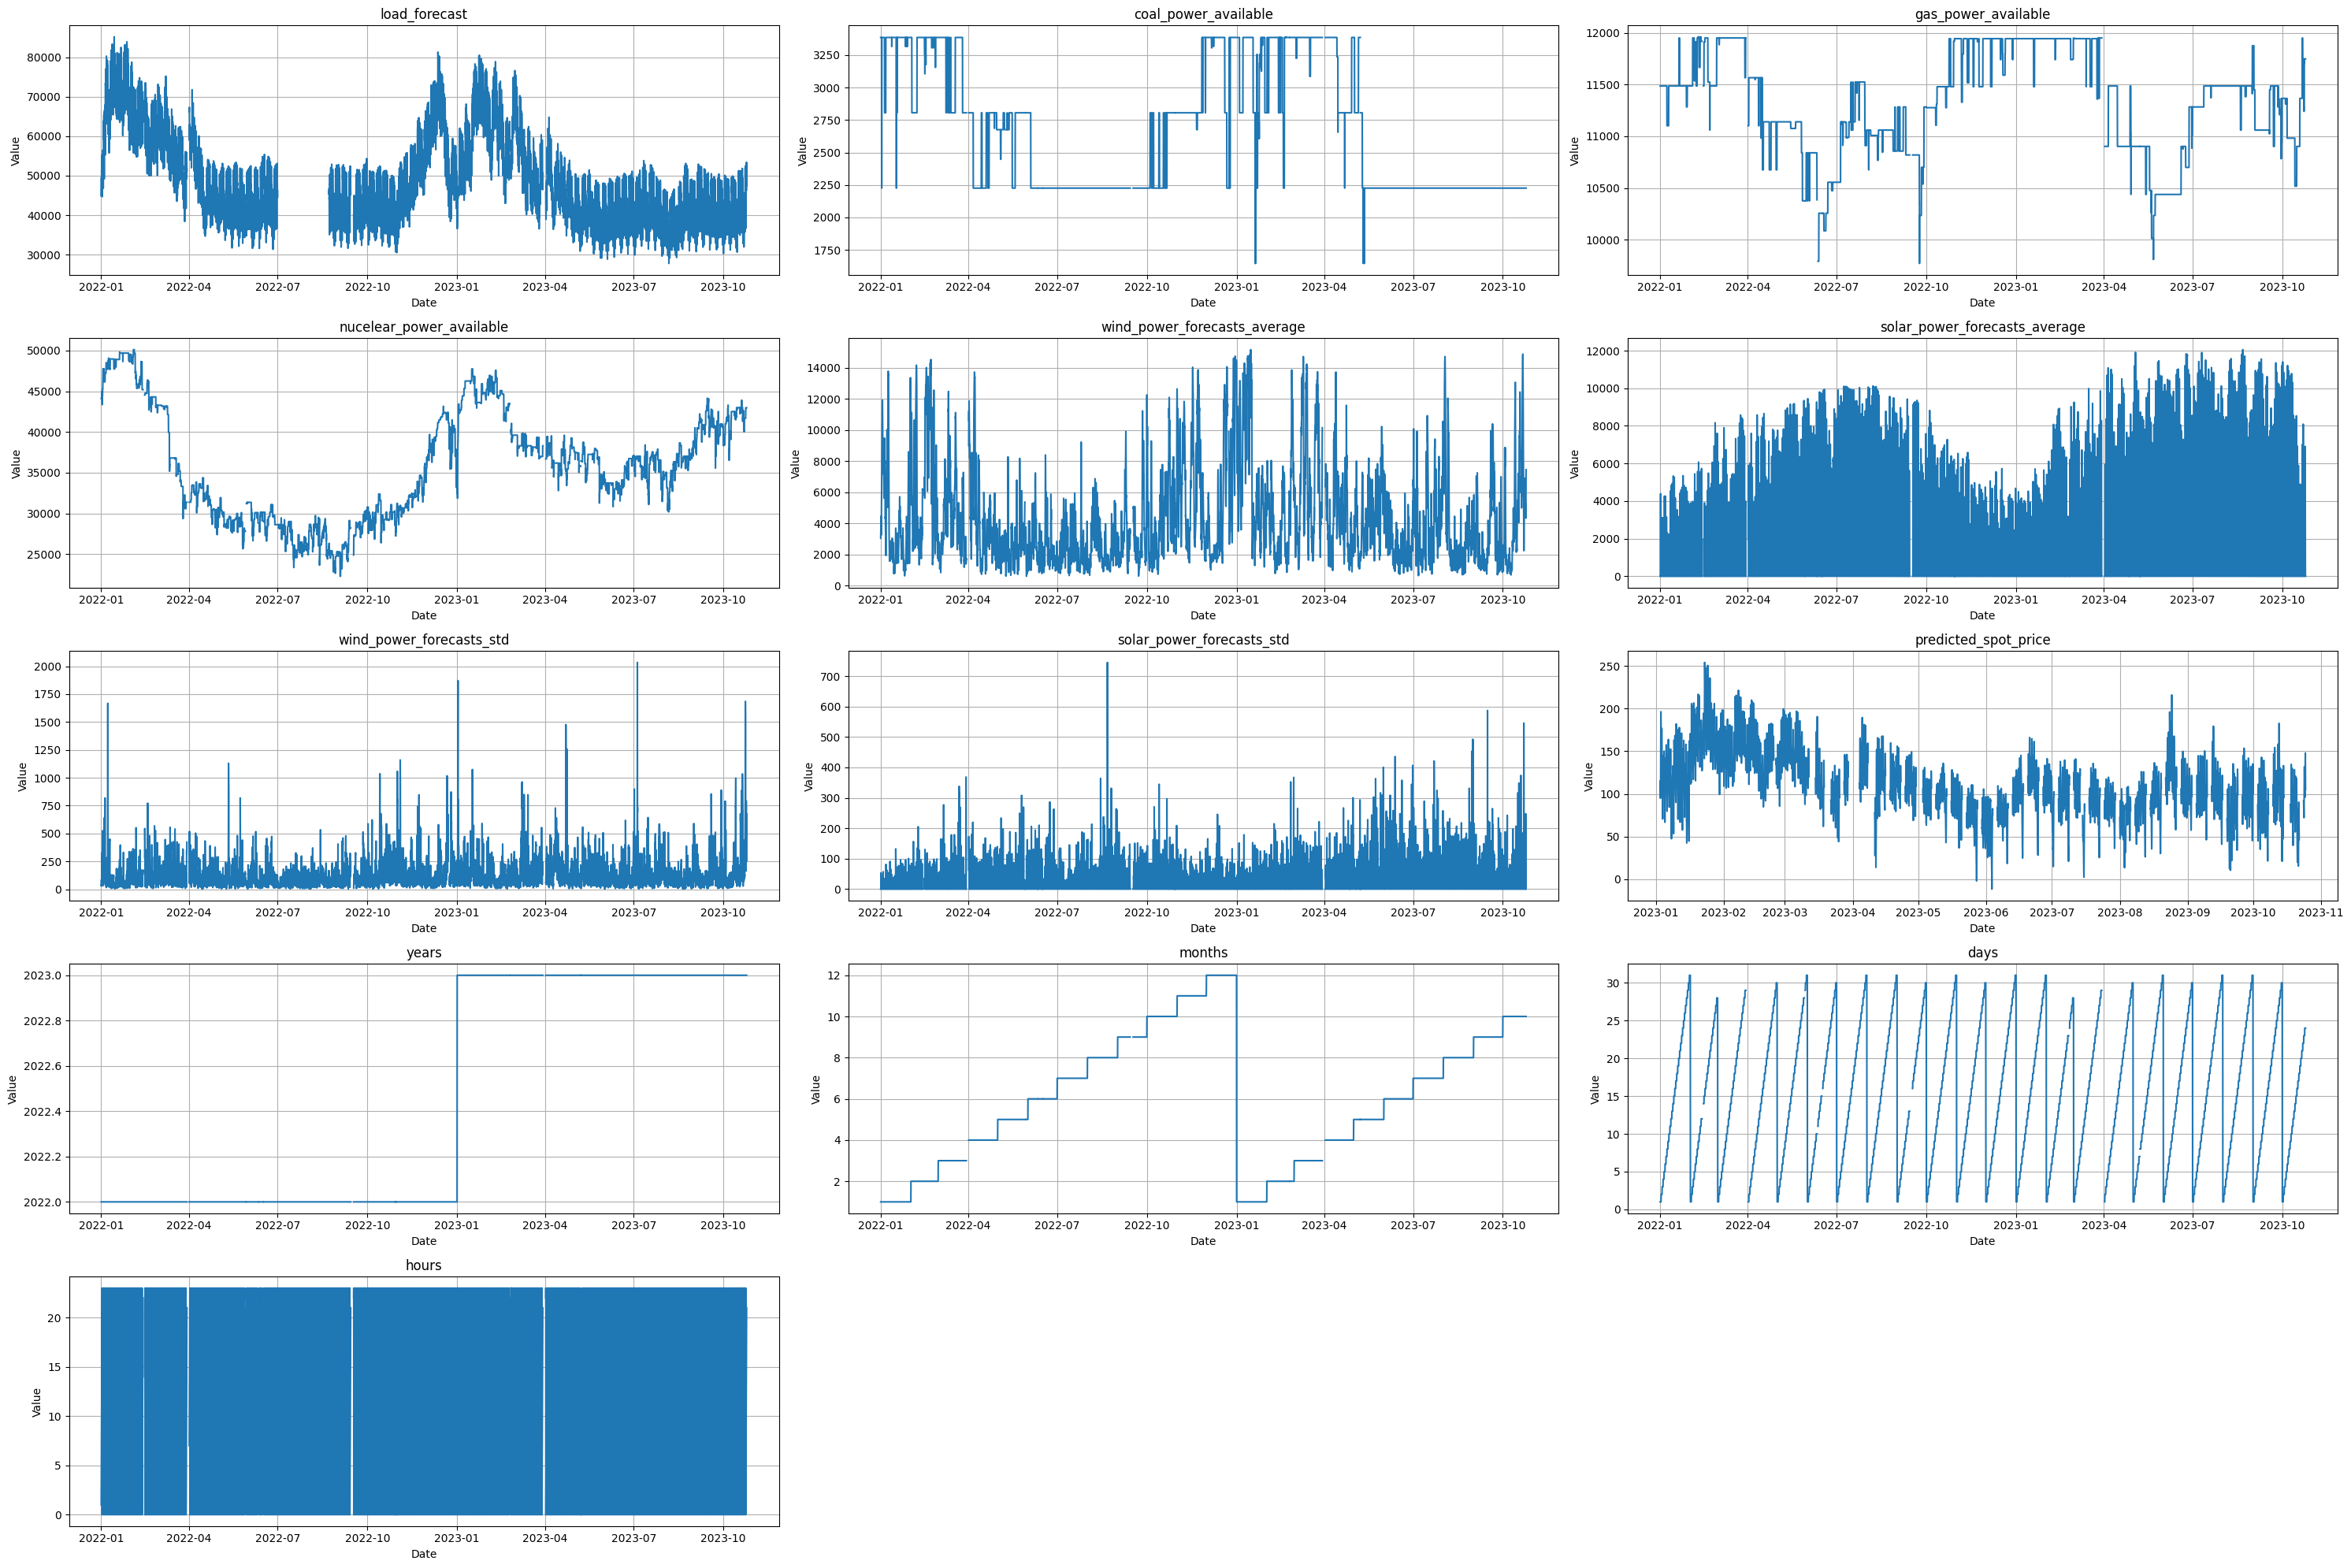

In [25]:
n_features = len(X.columns)
cols = 3 
rows = (n_features + cols - 1) // cols

fig, axs = plt.subplots(rows, cols, figsize=(cols * 10, rows * 4))
axs = axs.flatten()

for i, column in enumerate(X.columns):
    axs[i].plot(X.index, X[column])
    axs[i].set_title(column)
    axs[i].set_xlabel('Date')
    axs[i].set_ylabel('Value')
    axs[i].grid(True)

for j in range(n_features, len(axs)):
    axs[j].axis('off')

plt.tight_layout()
plt.show()


## DAILY AND SUB-DAILY PRICE

We are going to check the difference between daily and sub-daily data.

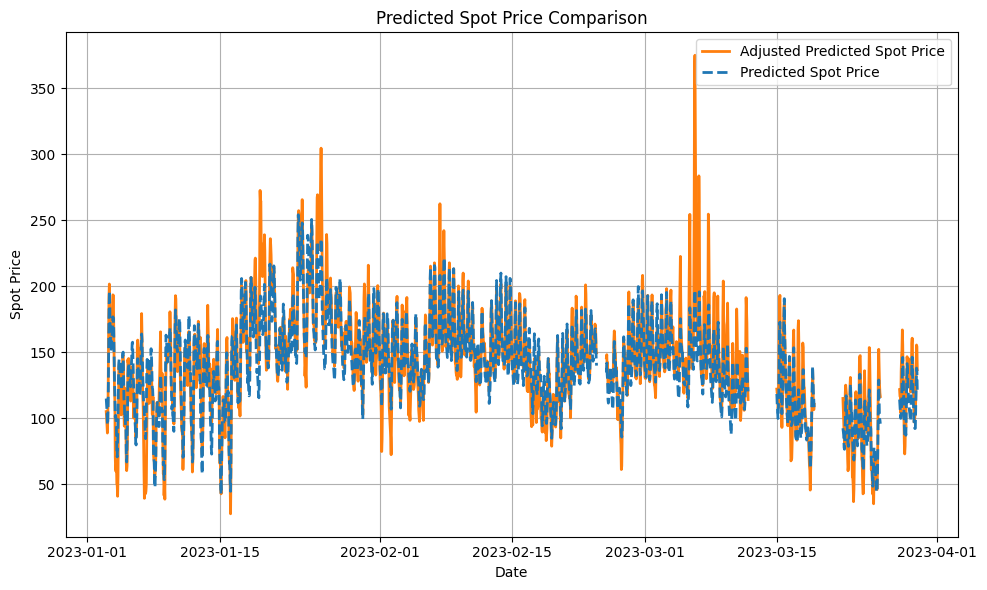

In [6]:
Y_train = pd.read_csv('../data/Y_train.csv')
Y_train = convertToDatetime(Y_train)
Y_train = fillMissingDates(Y_train)

x_train = fillMissingDates(X_train)

# Compute the adjusted predicted spot price
adjusted_predicted_spot_price = x_train['predicted_spot_price'] + Y_train['spot_id_delta'].reindex(x_train.index, fill_value=0)

plt.figure(figsize=(10, 6))
plt.plot(x_train.index, adjusted_predicted_spot_price, label='Adjusted Predicted Spot Price', color='tab:orange', linestyle='-', linewidth=2)
plt.plot(x_train.index, x_train['predicted_spot_price'], label='Predicted Spot Price', color='tab:blue', linestyle='--', linewidth=2)
plt.title('Predicted Spot Price Comparison')
plt.xlabel('Date')
plt.ylabel('Spot Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## DAY HOUR PLOT

We are going to plot the mean per day to observe the periodicity

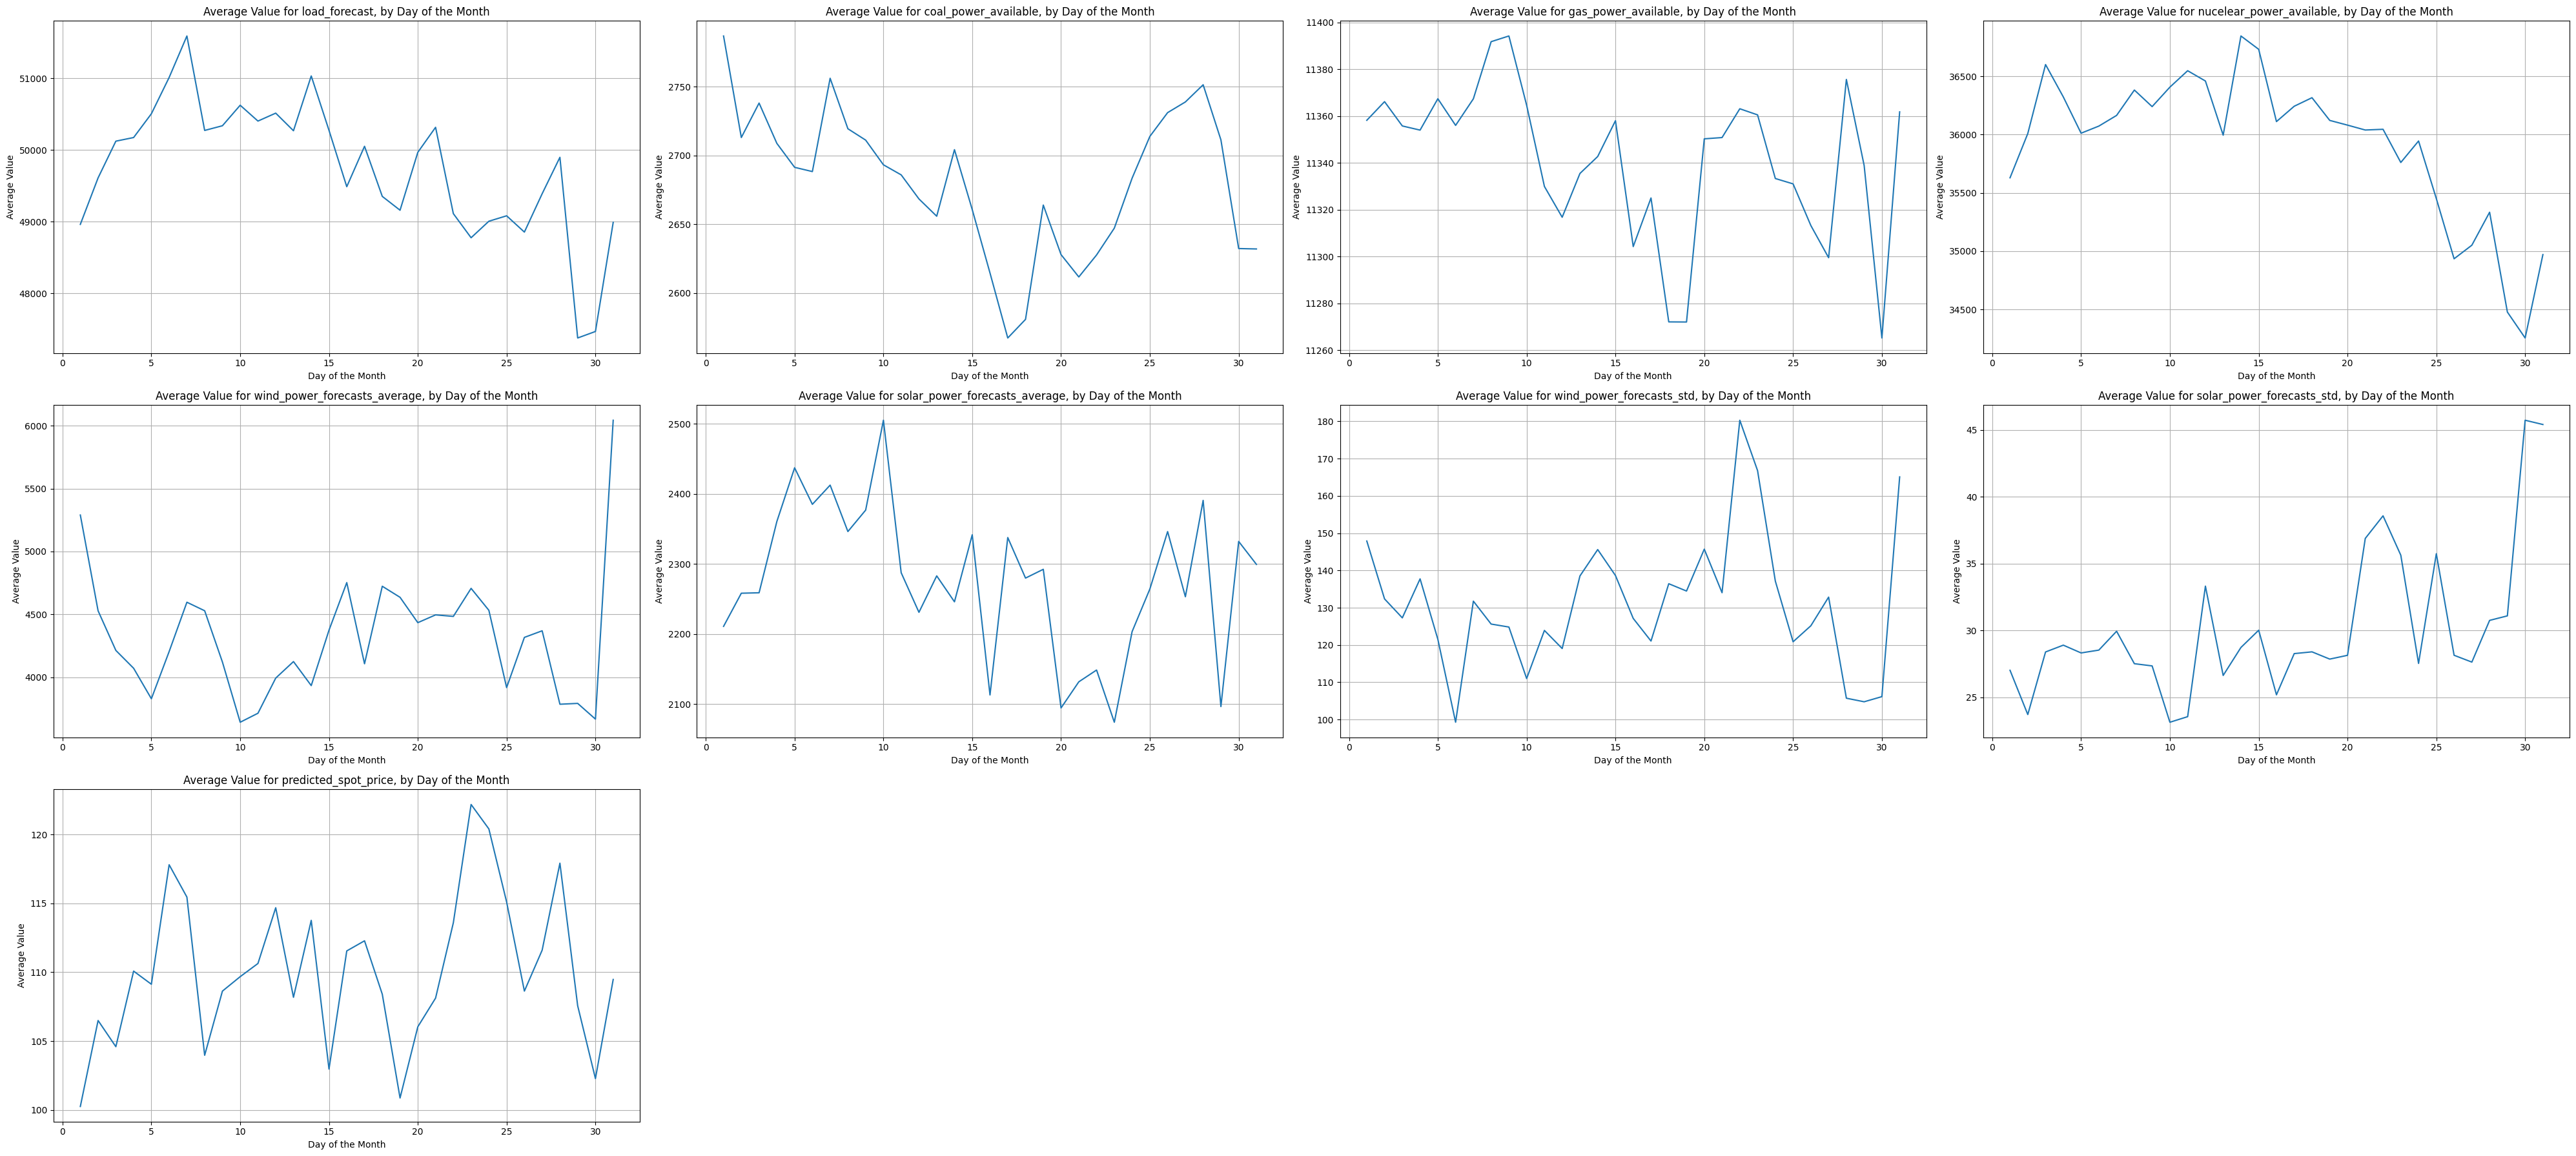

In [24]:
daily_means = X.resample('D').mean()
grouped_by_day = daily_means.groupby(daily_means.index.day).mean()

n_features = len(grouped_by_day.columns) - 4
cols = 4
rows = (n_features + cols - 1) // cols

fig, axs = plt.subplots(rows, cols, figsize=(cols * 10, rows * 6))
axs = axs.flatten()

for i, column in enumerate([col for col in grouped_by_day.columns if col not in ['years', 'months', 'days', 'hours']]):
    axs[i].plot(grouped_by_day.index, grouped_by_day[column], linestyle='-')
    axs[i].set_title(f'Average Value for {column}, by Day of the Month')
    axs[i].set_xlabel('Day of the Month')
    axs[i].set_ylabel('Average Value')
    axs[i].grid(True)

for j in range(i + 1, len(axs)):
    axs[j].axis('off')

plt.tight_layout()
plt.show()


Let's do the same for hours.

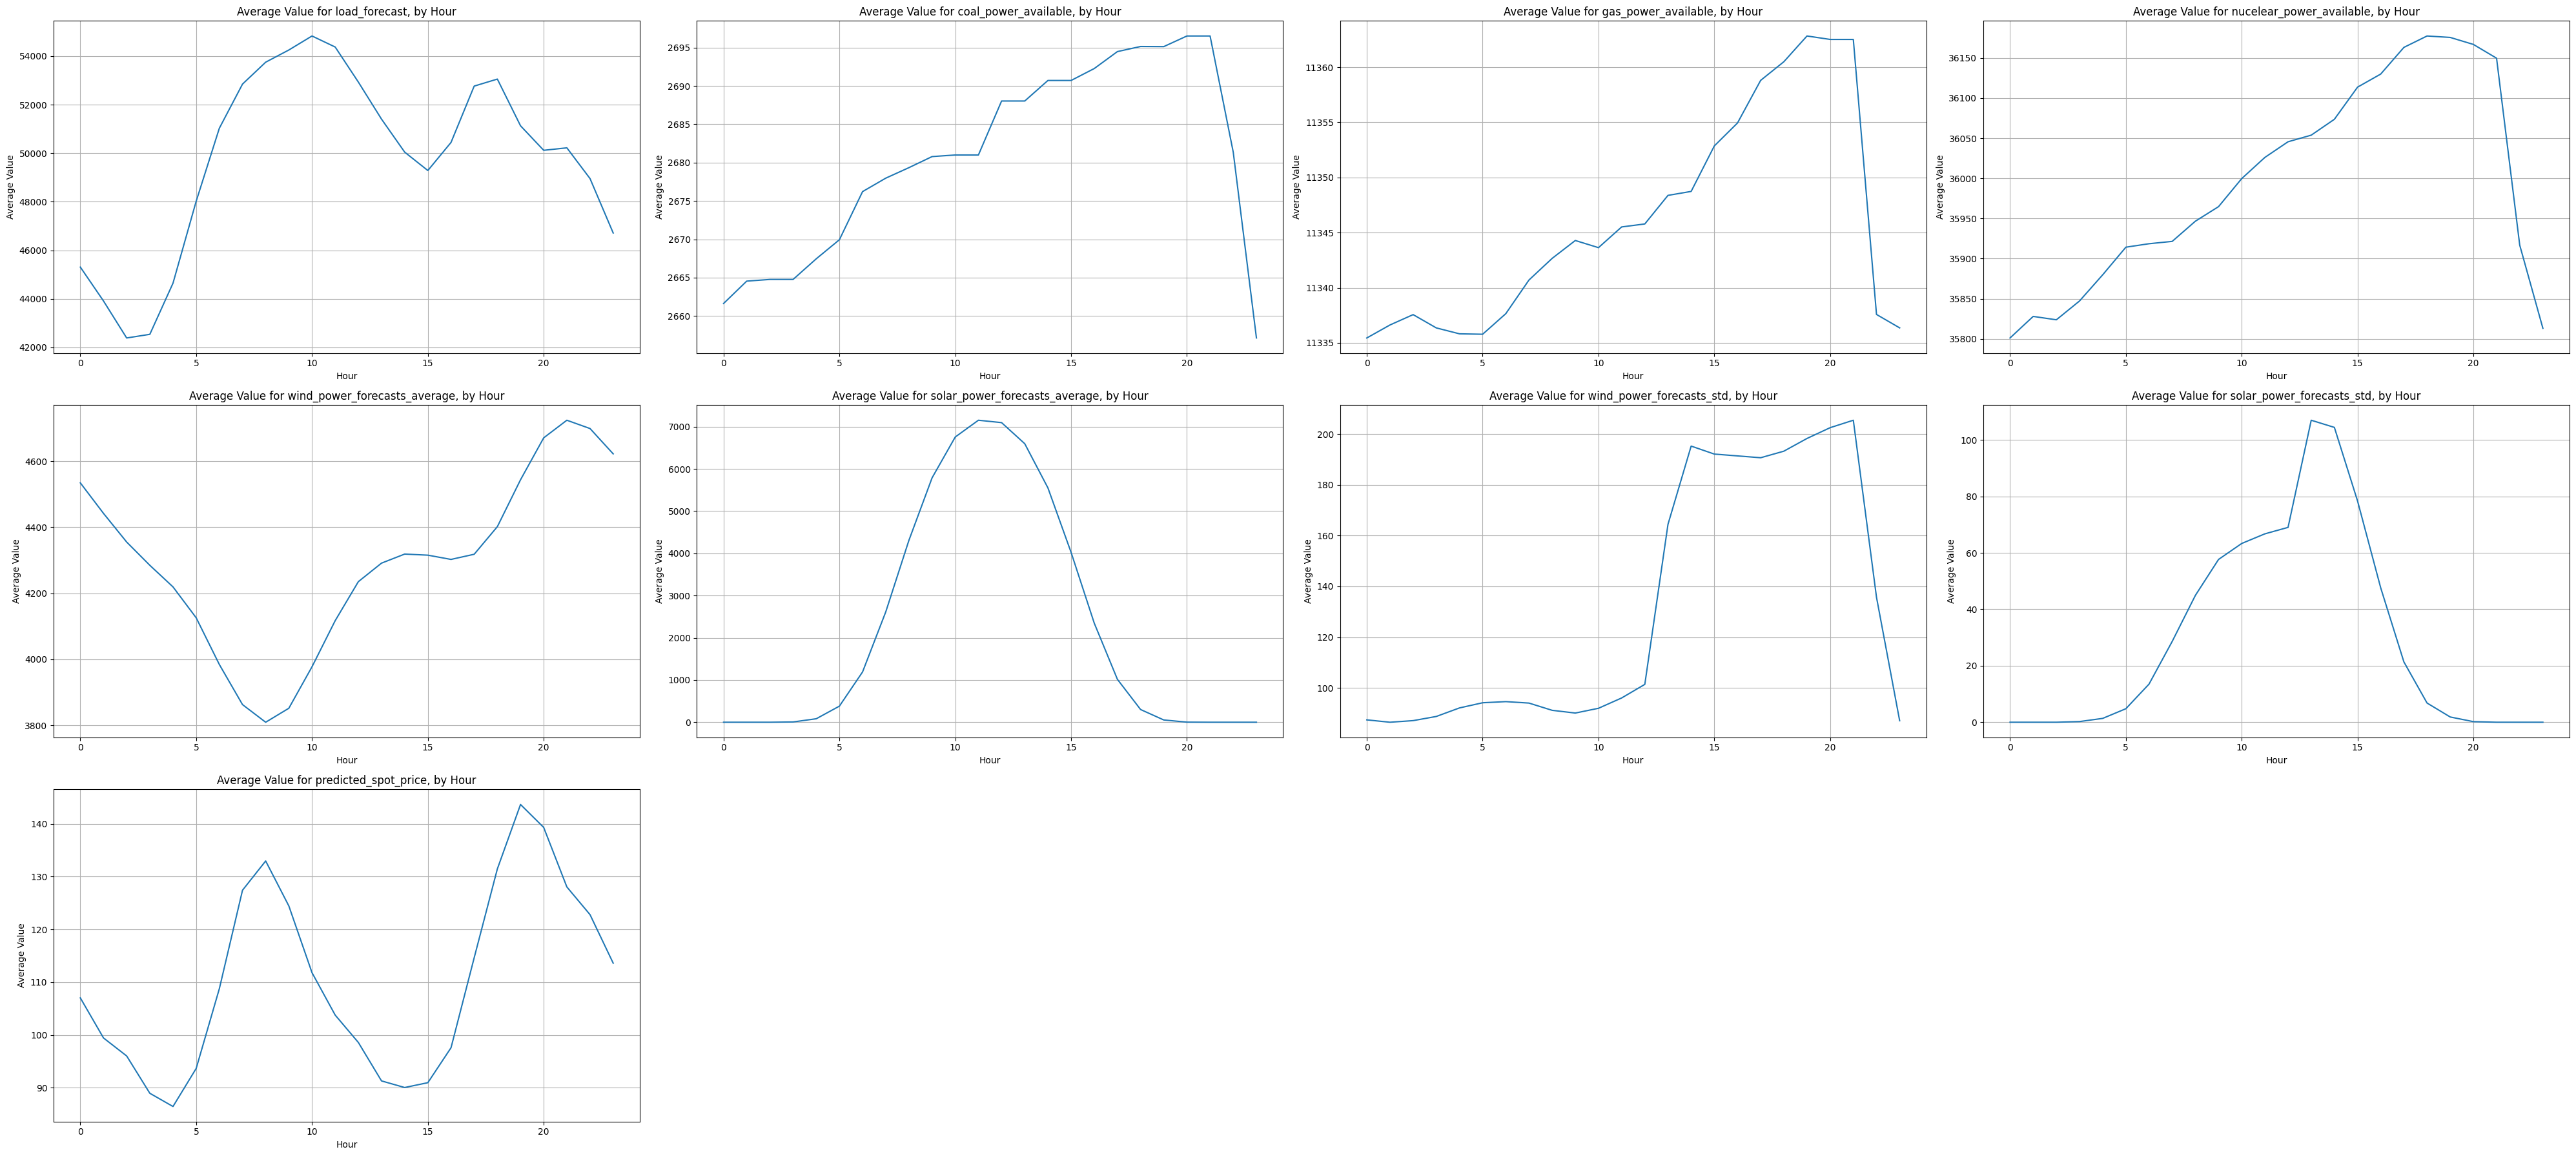

In [23]:
hours_means = X.resample('H').mean()
grouped_by_hours = hours_means.groupby(hours_means.index.hour).mean()

n_features = grouped_by_hours.columns.size - 4
cols = 4
rows = (n_features + cols - 1) // cols

fig, axs = plt.subplots(rows, cols, figsize=(cols * 10, rows * 6))
axs = axs.flatten()

for i, column in enumerate(grouped_by_hours.columns):
    if column not in ['years', 'months', 'days', 'hours']:
        axs[i].plot(grouped_by_hours.index, grouped_by_hours[column], linestyle='-')
        axs[i].set_title(f'Average Value for {column}, by Hour')
        axs[i].set_xlabel('Hour')
        axs[i].set_ylabel('Average Value')
        axs[i].grid(True)

for j in range(n_features, len(axs)):
    axs[j].axis('off')

plt.tight_layout()
plt.show()


## LAG PLOT

In [9]:
def plot_lag_plots_grid(df, lag=1):
    df = df.drop(columns=['years', 'months', 'days', 'hours'])  # Drop specified columns
    daily_means = df.resample('D').mean()
    
    n = len(daily_means.columns)  # Determine grid size
    cols = int(np.ceil(np.sqrt(n)))
    rows = int(np.ceil(n / cols))

    fig, axs = plt.subplots(rows, cols, figsize=(cols*5, rows*5))  # Create figure with subplots
    fig.subplots_adjust(hspace=0.4, wspace=0.4)
    
    axs = axs.flatten()  # Flatten the array for easy indexing
    
    for i, column in enumerate(daily_means.columns):
        lag_plot(daily_means[column], lag=lag, ax=axs[i])
        axs[i].set_title(f'Lag Plot of {column} (Lag = {lag})')
    
    for j in range(i + 1, len(axs)):
        axs[j].axis('off')

    plt.show()

output = Output()
lag = 1  # Global variable for lag

def on_button_clicked(b):
    global lag  # Refer to the global variable 'lag'
    if b.description == "Next Lag":
        lag += 1
    elif b.description == "Previous Lag":
        lag = max(1, lag - 1)  # Prevent lag from going below 1
    
    with output:
        clear_output(wait=True)
        plot_lag_plots_grid(X, lag=lag)  # Update plot with new lag

# Setup buttons
button_next = Button(description="Next Lag")
button_prev = Button(description="Previous Lag")

# Attach the click event handler to both buttons
button_next.on_click(lambda b: on_button_clicked(b))
button_prev.on_click(lambda b: on_button_clicked(b))

# Display the buttons and output widget
display(HBox([button_prev, button_next]), output)


Output()

## AUTOCORRELATION

Let's check the autocorrelation of the data.

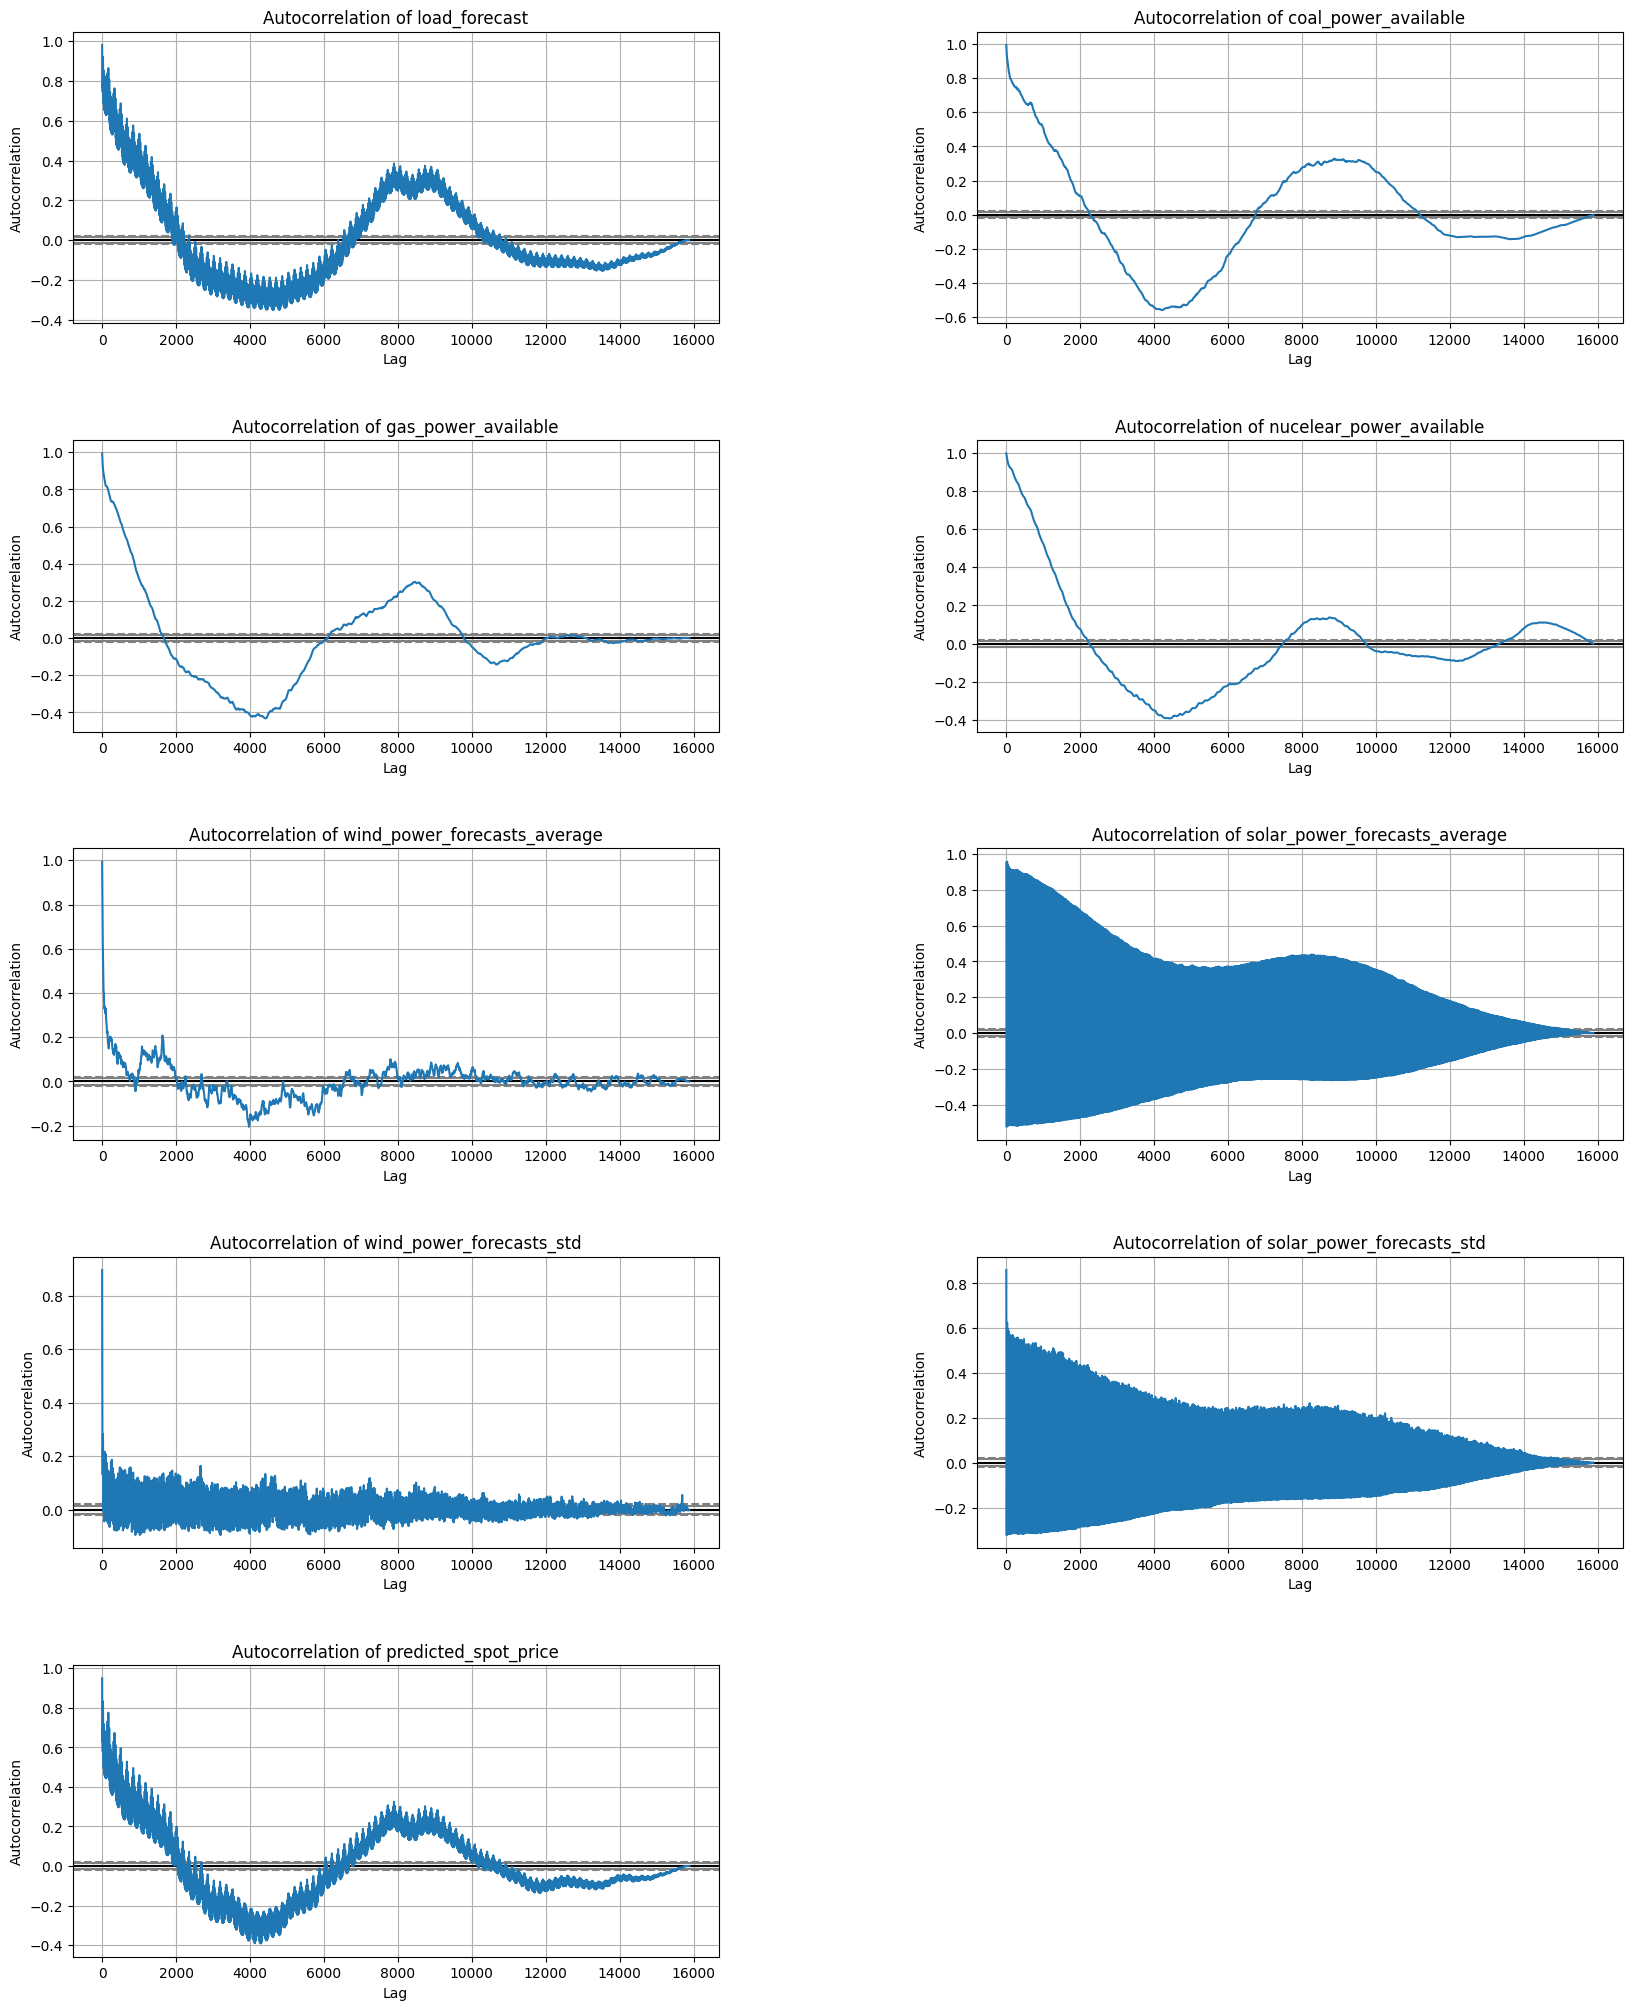

In [22]:
def plot_autocorrelation_plots(df):
    df = df.drop(columns=['years', 'months', 'days', 'hours'])

    # Apply KNN imputation
    imputer = KNNImputer(n_neighbors=5)  # You can adjust n_neighbors based on your dataset
    df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

    n = len(df.columns)
    cols = 2
    rows = int(np.ceil(n / cols))

    fig, axs = plt.subplots(rows, cols, figsize=(cols*10, rows*5))
    fig.subplots_adjust(hspace=0.4, wspace=0.4)
    
    if rows * cols > 1:
        axs = axs.flatten()
    else:
        axs = [axs]
    
    for i, column in enumerate(df.columns):
        autocorrelation_plot(df[column], ax=axs[i])
        axs[i].set_title(f'Autocorrelation of {column}')
    
    for j in range(i + 1, len(axs)):
        axs[j].axis('off')  # Hide unused subplots

    plt.show()

plot_autocorrelation_plots(X)



The data is not stationary. I will try to identify more the trend by applying autocorrelation to the days and hours mean compute earlier.

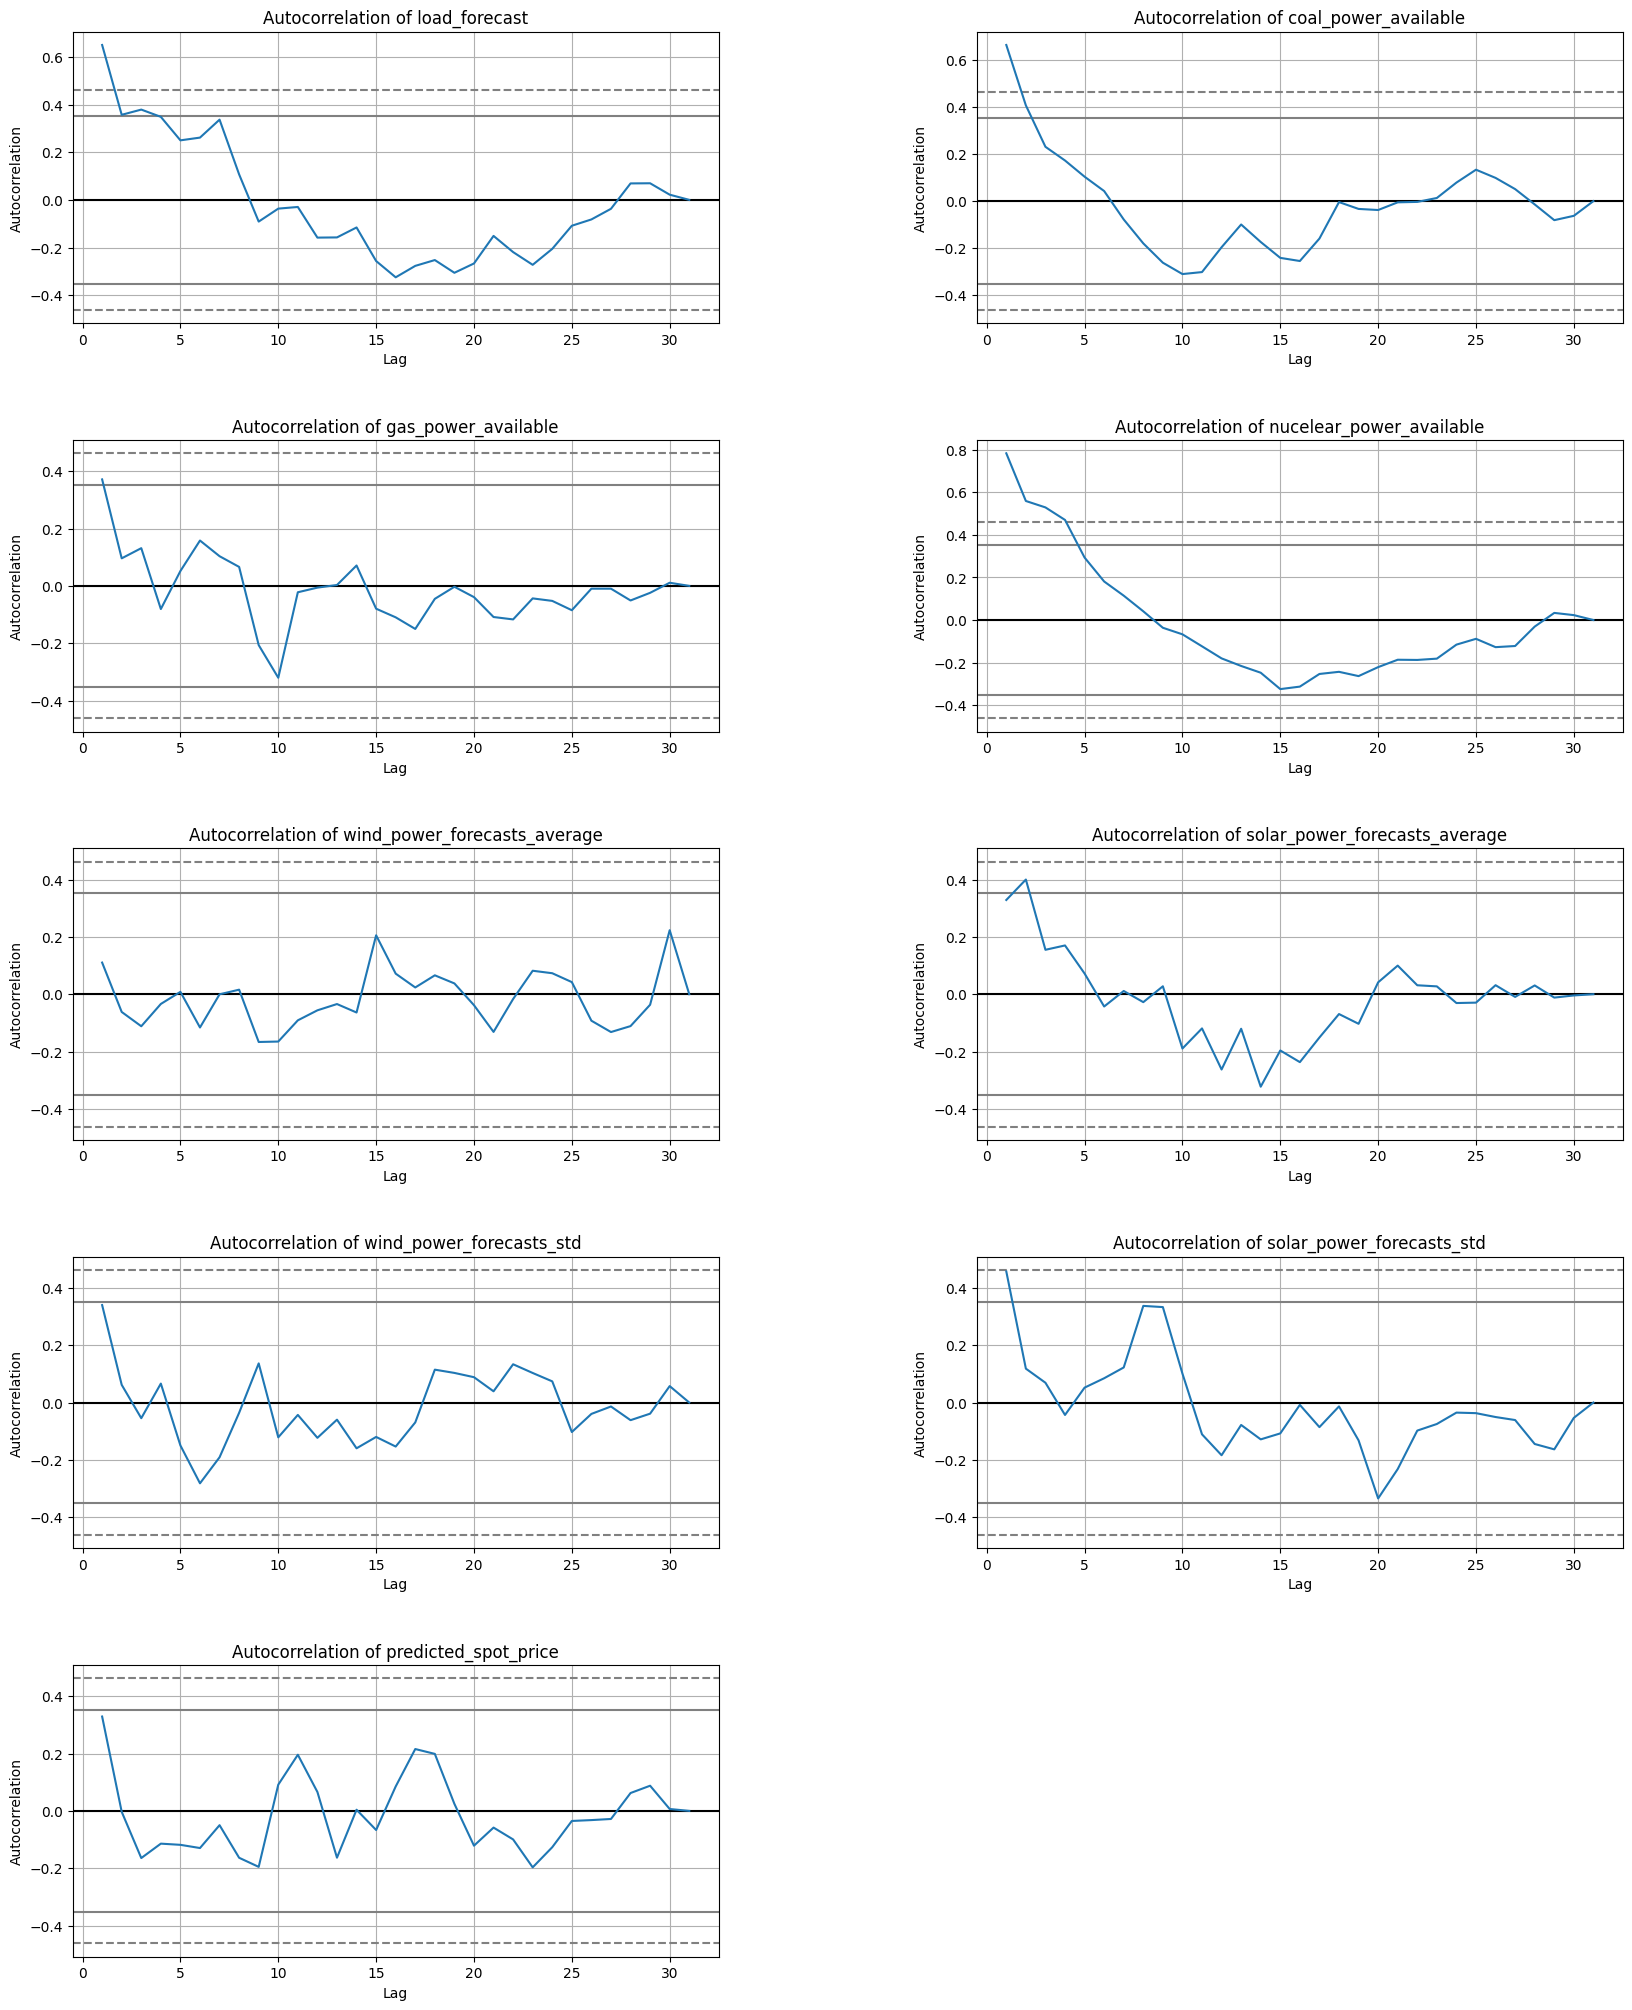

In [26]:
plot_autocorrelation_plots(grouped_by_day)

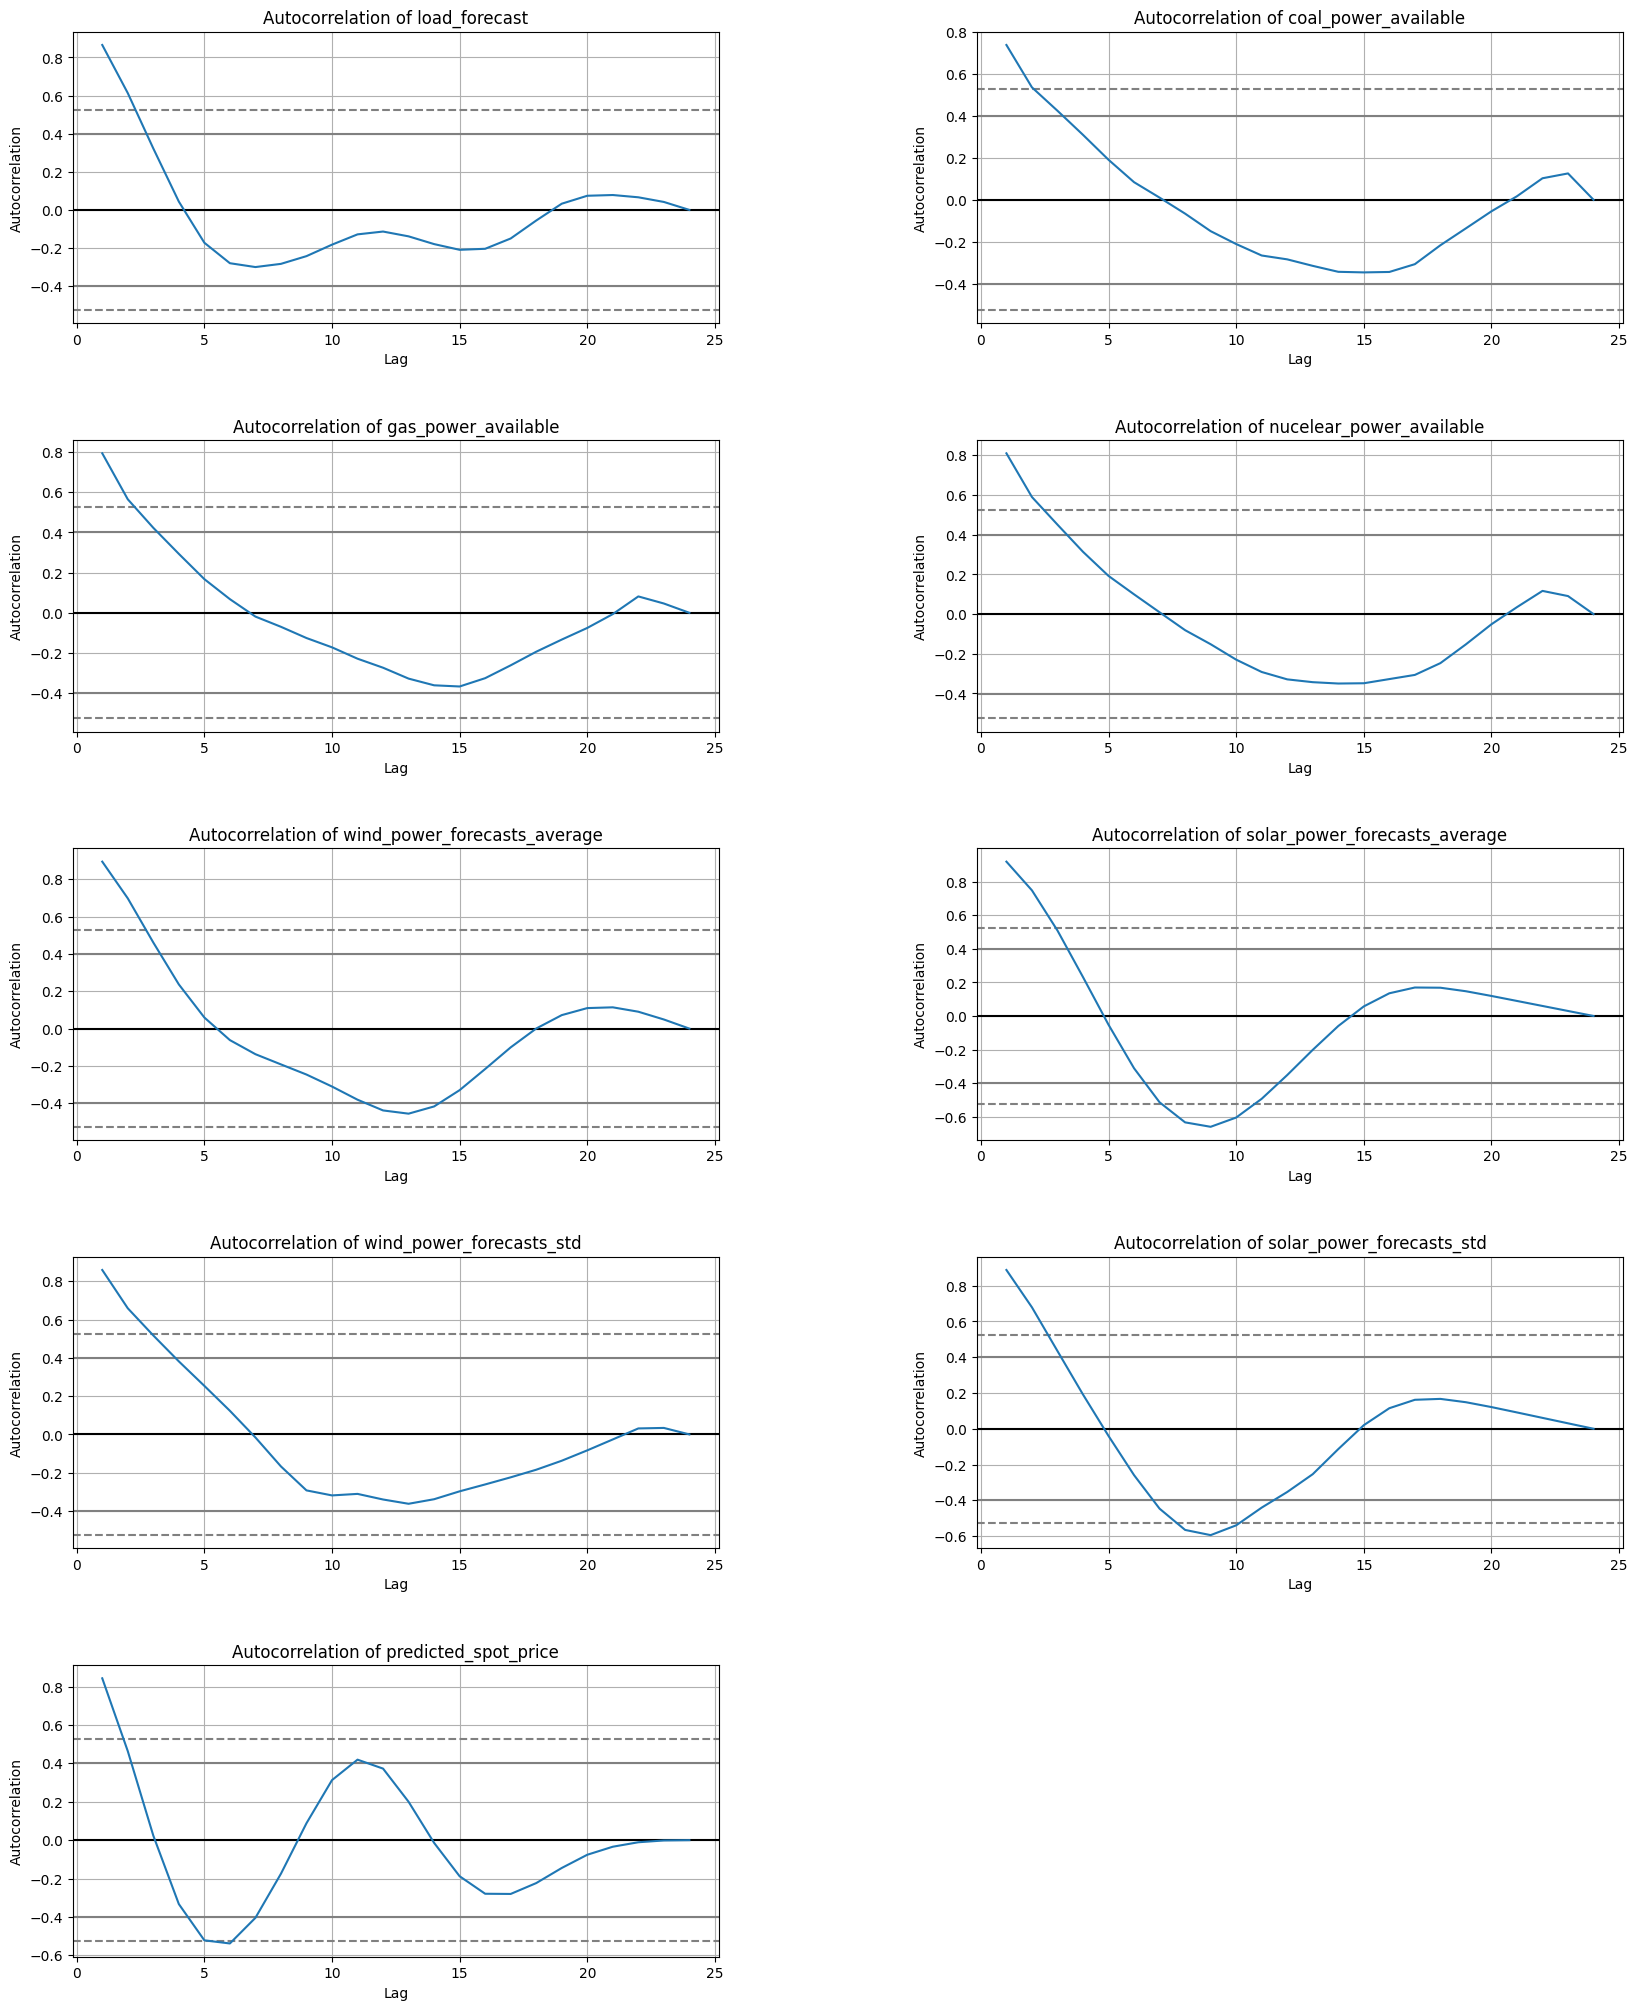

In [27]:
plot_autocorrelation_plots(grouped_by_hours)

Let's do a stationarity test to be sure.

In [32]:
for column in X.columns:
    print(f'Augmented Dickey-Fuller Test for {column}')
    result = adfuller(X[column].dropna())

    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])

Augmented Dickey-Fuller Test for load_forecast
ADF Statistic: -4.720258
p-value: 0.000077
Augmented Dickey-Fuller Test for coal_power_available
ADF Statistic: -3.438215
p-value: 0.009723
Augmented Dickey-Fuller Test for gas_power_available
ADF Statistic: -3.405341
p-value: 0.010778
Augmented Dickey-Fuller Test for nucelear_power_available
ADF Statistic: -2.139024
p-value: 0.229115
Augmented Dickey-Fuller Test for wind_power_forecasts_average
ADF Statistic: -9.711126
p-value: 0.000000
Augmented Dickey-Fuller Test for solar_power_forecasts_average
ADF Statistic: -4.550522
p-value: 0.000159
Augmented Dickey-Fuller Test for wind_power_forecasts_std
ADF Statistic: -12.928413
p-value: 0.000000
Augmented Dickey-Fuller Test for solar_power_forecasts_std
ADF Statistic: -13.094050
p-value: 0.000000
Augmented Dickey-Fuller Test for predicted_spot_price
ADF Statistic: -4.211115
p-value: 0.000631
Augmented Dickey-Fuller Test for years
ADF Statistic: -0.908214
p-value: 0.785255
Augmented Dickey-Full

Let's see if differencing the data can make it stationary.

In [34]:
def difference(dataset, interval = 1):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return np.array(diff)
 
def inverse_difference(history, yhat, interval=1):
    return yhat + history[-interval]

for column in X.columns:
    series = X[column].dropna()
    series_d1 = difference(series)
    result = adfuller(series_d1)

    print(f'Augmented Dickey-Fuller Test for {column} (1st Order Differencing)')
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])

Augmented Dickey-Fuller Test for load_forecast (1st Order Differencing)
ADF Statistic: -20.218613
p-value: 0.000000
Augmented Dickey-Fuller Test for coal_power_available (1st Order Differencing)
ADF Statistic: -24.971500
p-value: 0.000000
Augmented Dickey-Fuller Test for gas_power_available (1st Order Differencing)
ADF Statistic: -23.689426
p-value: 0.000000
Augmented Dickey-Fuller Test for nucelear_power_available (1st Order Differencing)
ADF Statistic: -22.746402
p-value: 0.000000
Augmented Dickey-Fuller Test for wind_power_forecasts_average (1st Order Differencing)
ADF Statistic: -26.090654
p-value: 0.000000
Augmented Dickey-Fuller Test for solar_power_forecasts_average (1st Order Differencing)
ADF Statistic: -29.221949
p-value: 0.000000
Augmented Dickey-Fuller Test for wind_power_forecasts_std (1st Order Differencing)
ADF Statistic: -30.613105
p-value: 0.000000
Augmented Dickey-Fuller Test for solar_power_forecasts_std (1st Order Differencing)
ADF Statistic: -32.446157
p-value: 0.0

Is the series seasonal ?

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf

plt.rcParams['figure.figsize'] = [plot_x_size, plot_y_size]

plot_acf(series)
plt.show()

plot_acf(series, lags = 730, use_vlines = True)
plt.show()